<a href="https://colab.research.google.com/github/Shanks1228/SteelDefectDetection/blob/master/Steel_Defect_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [0]:
!ls

'kaggle (1).json'	 severstal-steel-defect-detection.zip   train_images
 kaggle.json		 test_images
 sample_submission.csv	 train.csv


In [0]:
from fastai import *

In [0]:
from fastai.vision import *

In [0]:
cd

/root


In [0]:
cd /root/.kaggle

/root/.kaggle


In [0]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Found existing installation: kaggle 1.5.6
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.0.2)
Processing /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01/kaggle-1.5.6-py3-none-any.whl
Kaggle API 1.5.6


In [0]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [0]:
!kaggle competitions download -c severstal-steel-defect-detection

severstal-steel-defect-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip 'severstal-steel-defect-detection.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train_images/99f9d2375.jpg  
  inflating: train_images/99fd3c6f5.jpg  
  inflating: train_images/9a016fe15.jpg  
  inflating: train_images/9a064450d.jpg  
  inflating: train_images/9a08c2783.jpg  
  inflating: train_images/9a18e4457.jpg  
  inflating: train_images/9a1f7c238.jpg  
  inflating: train_images/9a2523ce9.jpg  
  inflating: train_images/9a3e774ff.jpg  
  inflating: train_images/9a5e9e77c.jpg  
  inflating: train_images/9a5f7a855.jpg  
  inflating: train_images/9a62177bb.jpg  
  inflating: train_images/9a67575cf.jpg  
  inflating: train_images/9a6ac5406.jpg  
  inflating: train_images/9a70057c0.jpg  
  inflating: train_images/9a72fd89e.jpg  
  inflating: train_images/9a75974ba.jpg  
  inflating: train_images/9a762b892.jpg  
  inflating: train_images/9a7b2f3af.jpg  
  inflating: train_images/9a7b427b4.jpg  
  inflating: train_images/9a81a8056.jpg  
  inflating: train_images/9a83c23d1.jpg  
  inflating: train_images

In [0]:
import pandas as pd
import numpy as np

In [0]:
train_df = pd.read_csv('train.csv')
train_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.60)


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
path = 'train_images/'

In [0]:
bs = 64

In [0]:
fn_paths = [path+name for name in train_df['ImageId']]

In [0]:
train_df[train_df['ClassId'] != 1] = 'Defect'
train_df[train_df['ClassId'] == 1] = 'No Defect'

In [0]:
labels = list(train_df['ClassId'])

In [0]:
no_defects_index = train_df[train_df['ClassId'] == 'No Defect'].index
defects_index = train_df[train_df['ClassId'] == 'Defect'].index

In [0]:
train_df_stratified = train_df.iloc[np.concatenate([defects_index_random, no_defects_index]),:]

In [0]:
train_df_stratified.head()

,ImageId,ClassId,EncodedPixels
6440,Defect,Defect,Defect
6395,Defect,Defect,Defect
3784,Defect,Defect,Defect
517,Defect,Defect,Defect
6182,Defect,Defect,Defect


In [0]:
print(pd.DataFrame({'NB':train_df_stratified.groupby(['ClassId']).size()}).reset_index())

     ClassId   NB
0     Defect  897
1  No Defect  897


In [0]:
train_df_stratified.shape

(1794, 3)

In [0]:
fn_paths_stra = [path+name for name in train_df_stratified['ImageId']]

In [0]:
train_df_stratified[train_df_stratified['ClassId'] != 1] = 'Defect'
train_df_stratified[train_df_stratified['ClassId'] == 1] = 'No Defect'

In [0]:
print(len(no_defects_index), '\n', len(defects_index))

897 
 6198


In [0]:
import numpy as np
defects_index_random = np.random.choice(defects_index, len(no_defects_index))

In [0]:
labels = list(train_df_stratified['ClassId'])

In [0]:
data = ImageDataBunch.from_lists(path, fn_paths_stra, labels=labels, ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

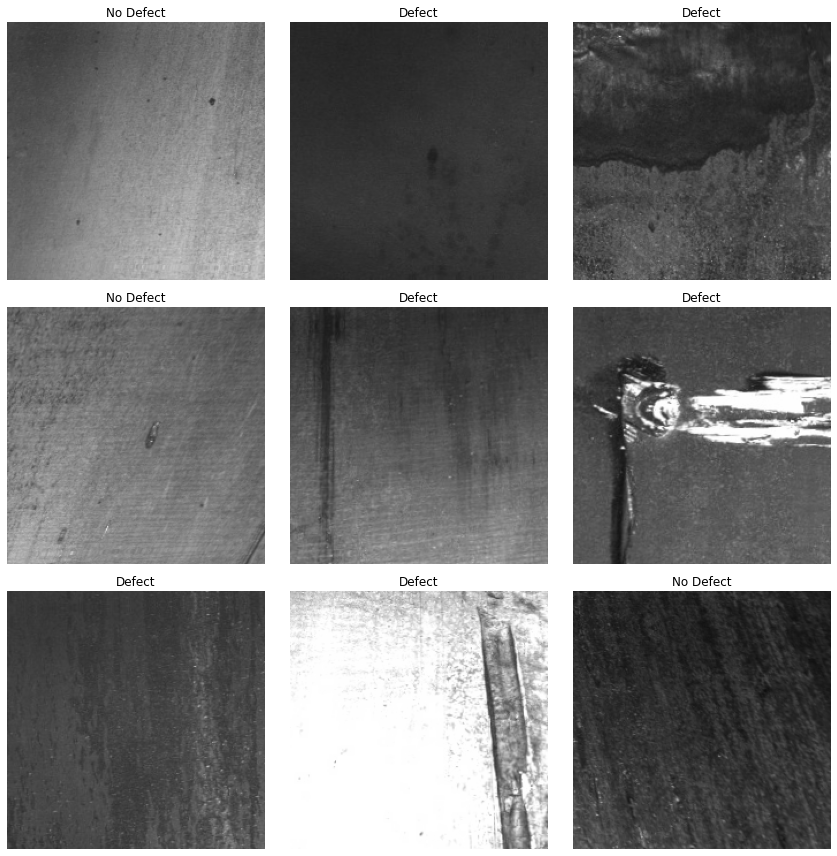

In [0]:
data.show_batch(rows=3, figure=(7,6))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Defect', 'No Defect'], 2, 1436, 358)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.670226,0.406912,0.189944,00:55
1,0.659774,0.448276,0.198324,00:56
2,0.617598,0.444478,0.189944,00:55
3,0.603081,0.426354,0.192737,00:54


In [0]:
learn.path

PosixPath('/content')

In [0]:
learn.path = Path('/content/')

In [0]:
learn.export('steel_model.pkl')

In [0]:
import torch
model_save_name = 'classifier.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(learn.state_dict(), path)

In [0]:
test_data = os.listdir(directory)

In [0]:
img = open_image(directory+ '/' +test_data[26])

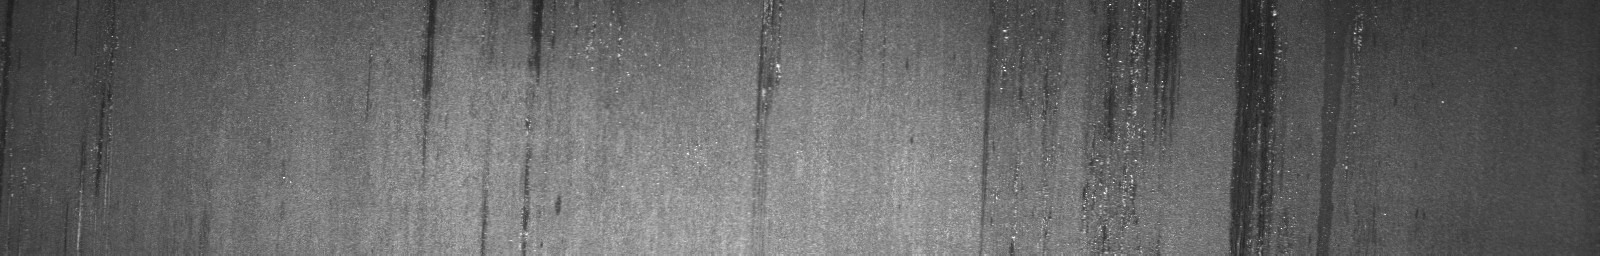

In [0]:
img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category 1

In [0]:
import os

In [0]:
directory = '/root/.kaggle/test_images'
a=0
pred=[]

In [0]:
for c in os.listdir(directory):
  img = open_image(directory+'/'+c)
  pred_class,pred_idx,outputs = learn.predict(img)
  pred.append(pred_class)
  a+=1
  print(a)
  if a==100:
    break

In [0]:
learn.save('stage-1');

In [0]:
learn.unfreeze()

In [0]:
learn.load('stage-1');

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


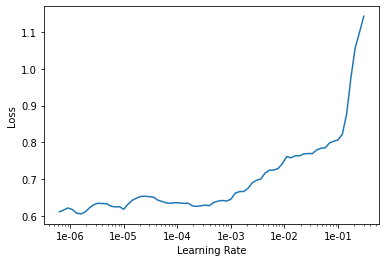

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [0]:
learn.save('stage-2')

In [0]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=get_transforms(), size=299, bs=bs//2
                                  ).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


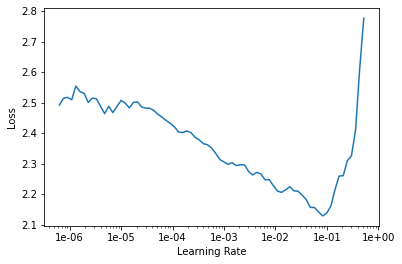

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

In [0]:
learn.save('stage-3')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,2.074675,1.450849,0.272023,05:40
1,1.286540,1994.607788,0.268499,05:35


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f34caab5ba8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f34c828e0b8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

KeyboardInterrupt: ignored

In [0]:
learn.load('stage-1-50');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

In [0]:
learn.export

NameError: ignored